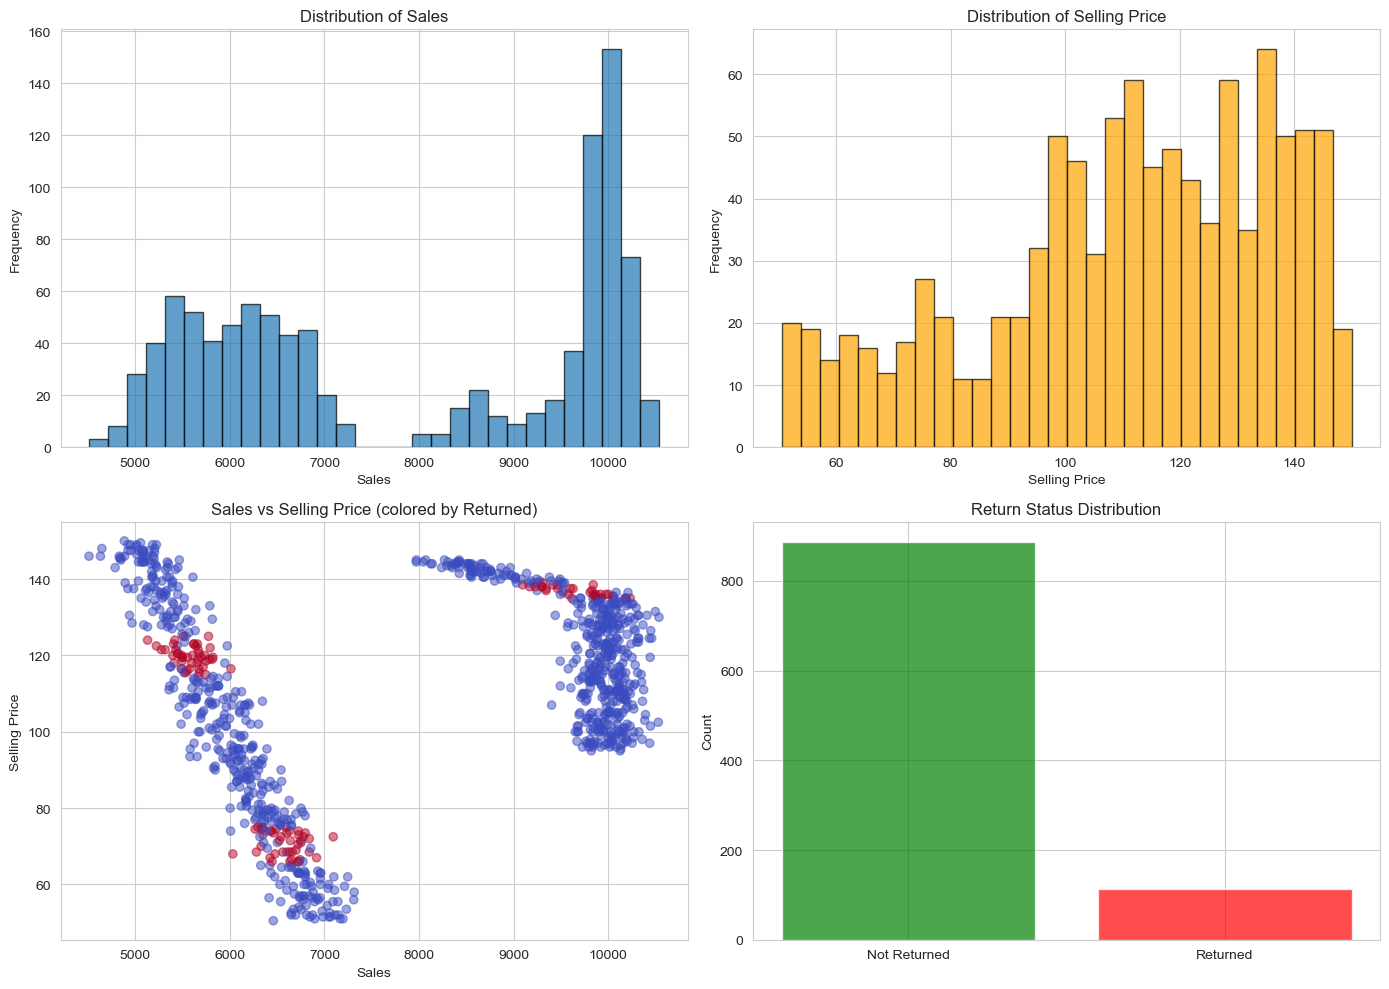

In [1]:
import pandas as pd
import seaborn as sns


df = pd.read_csv('fitco.csv')

df.describe()

import matplotlib.pyplot as plt

# Set style for better-looking plots
sns.set_style("whitegrid")

# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribution of Sales
axes[0, 0].hist(df['Sales'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution of Sales')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')

# 2. Distribution of SellingPrice
axes[0, 1].hist(df['SellingPrice'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Distribution of Selling Price')
axes[0, 1].set_xlabel('Selling Price')
axes[0, 1].set_ylabel('Frequency')

# 3. Scatter plot: Sales vs SellingPrice
axes[1, 0].scatter(df['Sales'], df['SellingPrice'], alpha=0.5, c=df['Returned'], cmap='coolwarm')
axes[1, 0].set_title('Sales vs Selling Price (colored by Returned)')
axes[1, 0].set_xlabel('Sales')
axes[1, 0].set_ylabel('Selling Price')

# 4. Bar chart: Return Rate
return_counts = df['Returned'].value_counts()
axes[1, 1].bar(['Not Returned', 'Returned'], return_counts.values, color=['green', 'red'], alpha=0.7)
axes[1, 1].set_title('Return Status Distribution')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# # Additional correlation heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
# plt.title('Correlation Heatmap')
# plt.show()

Business Use Cases for fitco.csv
Sales Optimization:
Analyze which products, price points, and city classes drive the most sales. Target marketing and inventory to high-performing segments.

Return Analysis:
Identify products or price ranges with high return rates. Improve product quality or adjust sales strategies to reduce returns.

Pricing Strategy:
Study the relationship between selling price and sales volume. Recommend optimal pricing for different city classes (e.g., premium pricing in class-A cities).

City Class Insights:
Compare sales and returns between class-A and other cities. Focus premium products and marketing on class-A cities with higher expendable income.

C:\Users\pravi\AppData\Local\Temp\ipykernel_1112\2920870283.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_price = df.groupby('PriceRange')['Sales'].agg(['mean', 'count', 'sum']).round(2)


Sales Performance by Price Range:
               mean  count        sum
PriceRange                           
50-60       6887.48     53   365036.5
60-70       6671.46     46   306887.0
70-80       6495.00     65   422175.0
80-90       6232.24     43   267986.5
90-100      8112.02    103   835538.5
100-110     8474.35    130  1101665.0
110-120     8392.40    152  1275645.0
120-130     8627.88    138  1190647.5
130-140     8531.97    149  1271264.0
140-150     6937.04    121   839382.0
150-160         NaN      0        0.0




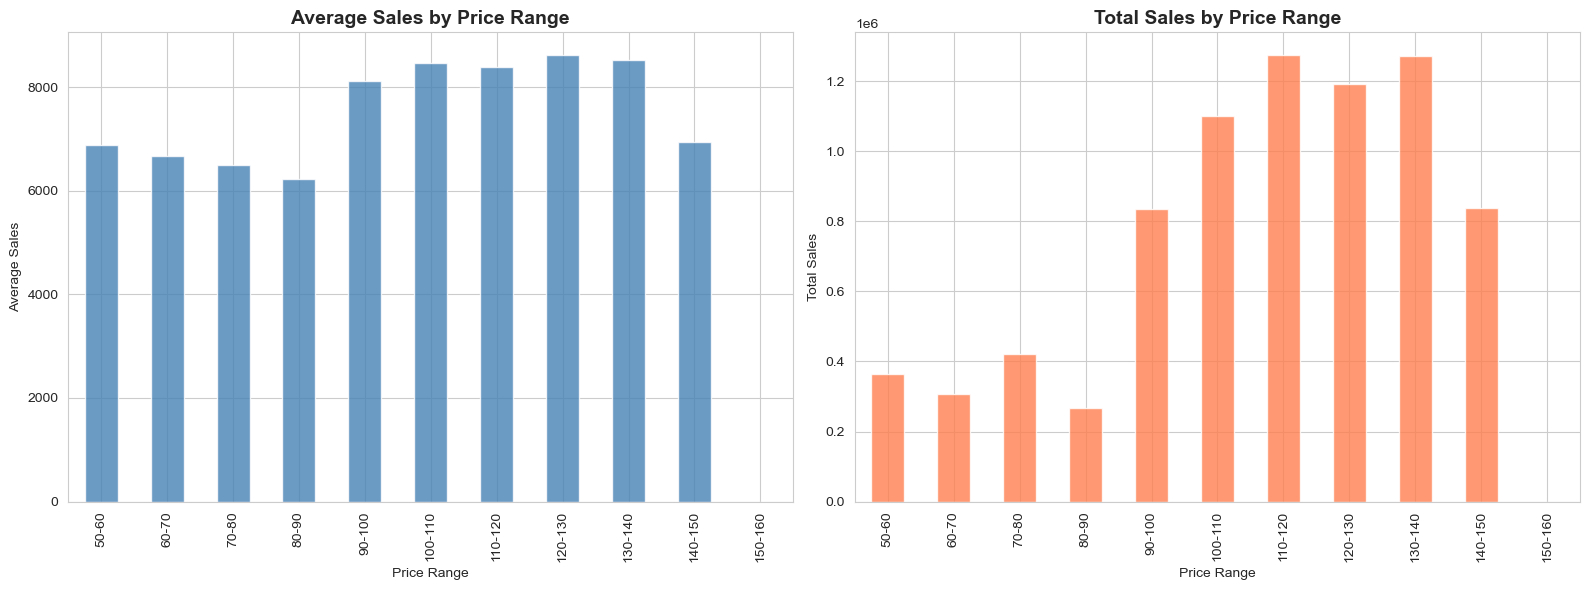

🎯 Recommendation: The '120-130' price range shows the highest average sales.
   Focus marketing and inventory on products in this range for optimal performance.


In [13]:
# 1. Sales by Price Ranges (intervals of 10)
min_price = int(df['SellingPrice'].min())
max_price = int(df['SellingPrice'].max())
bins = list(range(min_price, max_price + 11, 10))
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
df['PriceRange'] = pd.cut(df['SellingPrice'], bins=bins, labels=labels, include_lowest=True)

# Average sales by price range
sales_by_price = df.groupby('PriceRange')['Sales'].agg(['mean', 'count', 'sum']).round(2)
print("Sales Performance by Price Range:")
print(sales_by_price)
print("\n")

# 2. Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Average sales by price range
sales_by_price['mean'].plot(kind='bar', ax=axes[0], color='steelblue', alpha=0.8)
axes[0].set_title('Average Sales by Price Range', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price Range')
axes[0].set_ylabel('Average Sales')
axes[0].tick_params(axis='x', rotation=90)

# Total sales by price range
sales_by_price['sum'].plot(kind='bar', ax=axes[1], color='coral', alpha=0.8)
axes[1].set_title('Total Sales by Price Range', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price Range')
axes[1].set_ylabel('Total Sales')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# 3. Key insights
best_price_range = sales_by_price['mean'].idxmax()
print(f"🎯 Recommendation: The '{best_price_range}' price range shows the highest average sales.")
print(f"   Focus marketing and inventory on products in this range for optimal performance.")

C:\Users\pravi\AppData\Local\Temp\ipykernel_1112\2305995187.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returned_by_price = df[df['Returned'] == 1].groupby('PriceRange').size()


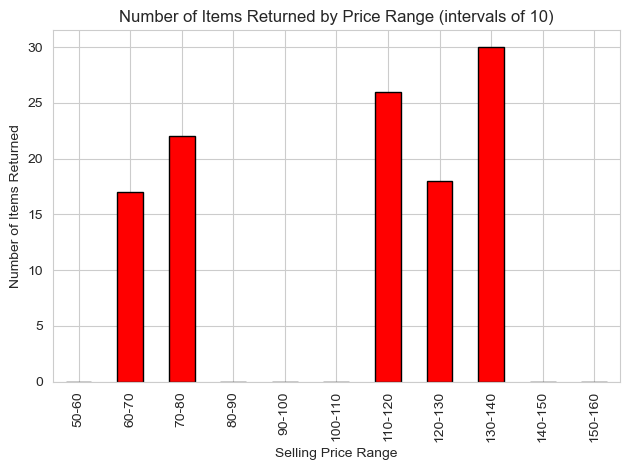

In [14]:
# Visualize number of items returned by price ranges (intervals of 10)
import matplotlib.pyplot as plt

# Ensure PriceRange column is defined with interval 10 bins
min_price = int(df['SellingPrice'].min())
max_price = int(df['SellingPrice'].max())
bins = list(range(min_price, max_price + 11, 10))
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
df['PriceRange'] = pd.cut(df['SellingPrice'], bins=bins, labels=labels, include_lowest=True)

# Count returned items in each price range
returned_by_price = df[df['Returned'] == 1].groupby('PriceRange').size()

# Plot
returned_by_price.plot(kind='bar', color='red', edgecolor='black')
plt.title('Number of Items Returned by Price Range (intervals of 10)')
plt.xlabel('Selling Price Range')
plt.ylabel('Number of Items Returned')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# Summarize sales and returns by price range (intervals of 10), and recommend focus areas
import pandas as pd

# Ensure PriceRange column is defined with interval 10 bins
min_price = int(df['SellingPrice'].min())
max_price = int(df['SellingPrice'].max())
bins = list(range(min_price, max_price + 11, 10))
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]
df['PriceRange'] = pd.cut(df['SellingPrice'], bins=bins, labels=labels, include_lowest=True)

# Aggregate sales and returns by price range
grouped = df.groupby('PriceRange').agg(
    total_sales=('Sales', 'sum'),
    avg_sales=('Sales', 'mean'),
    num_returns=('Returned', 'sum'),
    total_items=('Sales', 'count')
)
grouped['return_rate'] = grouped['num_returns'] / grouped['total_items']

total_sales_sum = grouped['total_sales'].sum()
grouped['pct_total_sales'] = (grouped['total_sales'] / total_sales_sum * 100).round(2)

# Sort by highest avg_sales and lowest return_rate
sorted_grouped = grouped.sort_values(['avg_sales', 'return_rate'], ascending=[False, True])

# Display sorted summary table
print('Sales and Returns by Price Range (intervals of 10), sorted by sales and return rate:')
display(sorted_grouped)

# Identify price ranges with high sales and low return rates
high_sales = sorted_grouped['total_sales'].max()
low_return = sorted_grouped['return_rate'].min()

focus_ranges = sorted_grouped[(sorted_grouped['total_sales'] >= 0.8 * high_sales) & (sorted_grouped['return_rate'] <= 1.2 * low_return)]

if not focus_ranges.empty:
    print('\nRecommended price ranges to focus on (high sales, low returns):')
    display(focus_ranges)
else:
    print('\nNo price range meets both criteria. Consider adjusting thresholds.')

Sales and Returns by Price Range (intervals of 10), sorted by sales and return rate:


C:\Users\pravi\AppData\Local\Temp\ipykernel_1112\1713935180.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('PriceRange').agg(


,total_sales,avg_sales,num_returns,total_items,return_rate,pct_total_sales
PriceRange,,,,,,
120-130,1190647.5,8627.880435,18,138,0.130435,15.12
130-140,1271264.0,8531.973154,30,149,0.201342,16.14
100-110,1101665.0,8474.346154,0,130,0.000000,13.99
110-120,1275645.0,8392.401316,26,152,0.171053,16.20
90-100,835538.5,8112.024272,0,103,0.000000,10.61
140-150,839382.0,6937.041322,0,121,0.000000,10.66
50-60,365036.5,6887.481132,0,53,0.000000,4.63
60-70,306887.0,6671.456522,17,46,0.369565,3.90
70-80,422175.0,6495.000000,22,65,0.338462,5.36



Recommended price ranges to focus on (high sales, low returns):


,total_sales,avg_sales,num_returns,total_items,return_rate,pct_total_sales
PriceRange,,,,,,
100-110,1101665.0,8474.346154,0,130,0.0,13.99


## Clustering Sales and Selling Price
Let's use KMeans clustering to identify the two distinct clusters in the Sales vs Selling Price data and analyze their characteristics.

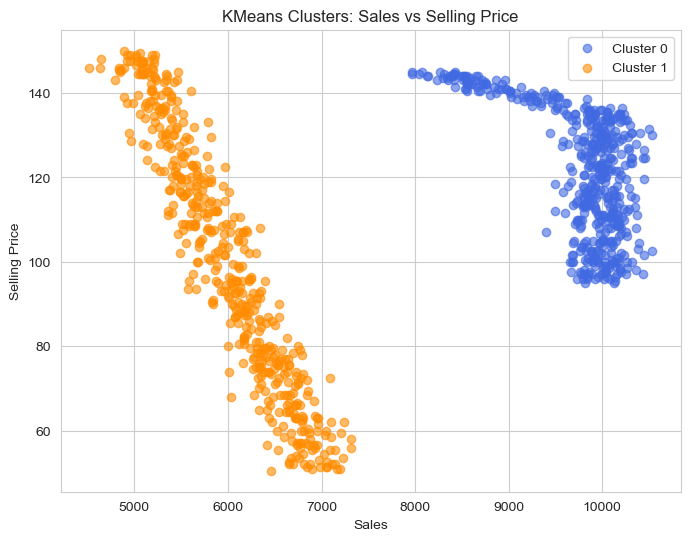


Cluster 0 stats:


KeyError: "['CityClass'] not in index"

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for clustering
X_cluster = df[['Sales', 'SellingPrice']].values

# Fit KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(8,6))
colors = np.array(['royalblue', 'darkorange'])
for i in range(2):
    plt.scatter(df[df['cluster']==i]['Sales'], df[df['cluster']==i]['SellingPrice'],
                c=colors[i], label=f'Cluster {i}', alpha=0.6)
plt.xlabel('Sales')
plt.ylabel('Selling Price')
plt.title('KMeans Clusters: Sales vs Selling Price')
plt.legend()
plt.show()

# Analyze cluster characteristics
for i in range(2):
    print(f"\nCluster {i} stats:")
    print(df[df['cluster']==i][['Sales','SellingPrice','Returned','CityClass']].describe())
    print('Return Rate:', df[df['cluster']==i]['Returned'].mean().round(3))
    print('Top City Class:', df[df['cluster']==i]['CityClass'].value_counts().idxmax())

## Simulate CityClass and Analyze Spending
Let's simulate a 'CityClass' column (A, B, C) assuming people from higher-tier cities spend more, and analyze cluster spending by city class.

Average Selling Price by Simulated CityClass:
CityClass
A    136.88
B    113.61
C     80.27
Name: SellingPrice, dtype: float64


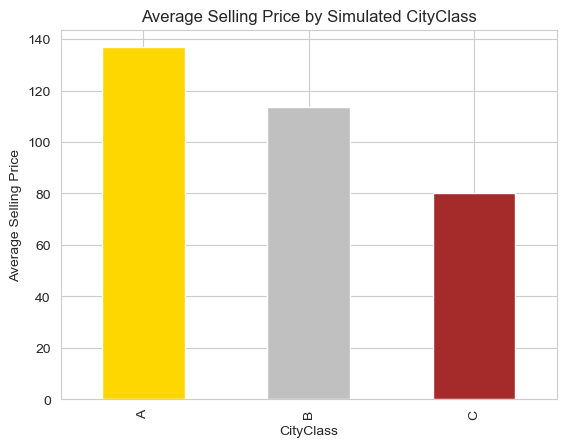


Cluster 0 - Avg Selling Price by CityClass:
CityClass
A    135.75
B    113.68
C     98.54
Name: SellingPrice, dtype: float64

Cluster 1 - Avg Selling Price by CityClass:
CityClass
A    139.04
B    113.49
C     75.44
Name: SellingPrice, dtype: float64


In [5]:
import numpy as np

# Simulate CityClass: assign based on SellingPrice (higher price = higher city class)
quantiles = df['SellingPrice'].quantile([0.33, 0.66]).values

def assign_city_class(price):
    if price >= quantiles[1]:
        return 'A'  # Top-tier city
    elif price >= quantiles[0]:
        return 'B'  # Mid-tier city
    else:
        return 'C'  # Lower-tier city

# Add simulated CityClass
df['CityClass'] = df['SellingPrice'].apply(assign_city_class)

# Analyze average spending by city class
avg_spending = df.groupby('CityClass')['SellingPrice'].mean().round(2)
print('Average Selling Price by Simulated CityClass:')
print(avg_spending)

# Visualize
import matplotlib.pyplot as plt
avg_spending.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.title('Average Selling Price by Simulated CityClass')
plt.xlabel('CityClass')
plt.ylabel('Average Selling Price')
plt.show()

# Cluster spending by city class
for i in range(2):
    print(f"\nCluster {i} - Avg Selling Price by CityClass:")
    print(df[df['cluster']==i].groupby('CityClass')['SellingPrice'].mean().round(2))

In [7]:
# Count returned products with selling price > 120
returned_high_price_count = df[(df['Returned'] == 1) & (df['SellingPrice'] > 130)].shape[0]
print(f"Number of returned products with selling price > 120: {returned_high_price_count}")

Number of returned products with selling price > 120: 30


In [ ]:
# Count of products returned by price range (bins of 10)
returned_counts_by_price = df[df['Returned'] == 1].groupby(pd.cut(df['SellingPrice'], bins=list(range(int(df['SellingPrice'].min()), int(df['SellingPrice'].max()) + 11, 10)))).size()

# Plot
returned_counts_by_price.plot(kind='bar', color='crimson', edgecolor='black')
plt.title('Count of Products Returned by Price Range (bins of 10)')
plt.xlabel('Selling Price Range')
plt.ylabel('Number of Products Returned')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\pravi\AppData\Local\Temp\ipykernel_8912\3423096286.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  returned_counts_by_price = df[df['Returned'] == 1].groupby(


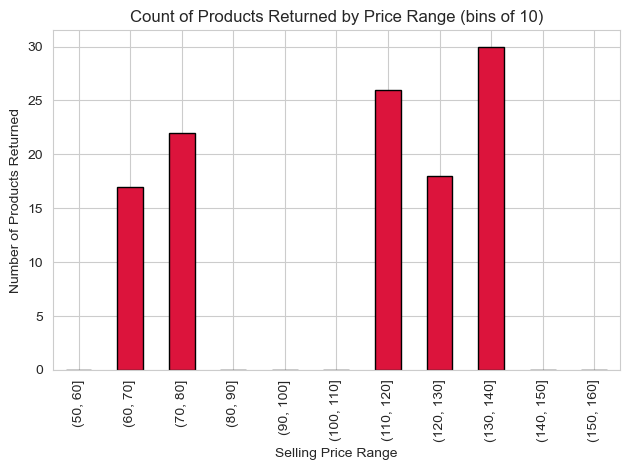

In [8]:
# Ensure the cell is set to Python, not R or other language.
import matplotlib.pyplot as plt
import pandas as pd

# If df is not defined, load your data
# df = pd.read_csv('fitco.csv')

# Create price bins
min_price = int(df['SellingPrice'].min())
max_price = int(df['SellingPrice'].max())
bins = list(range(min_price, max_price + 11, 10))

# Group and count returned products by price bin
returned_counts_by_price = df[df['Returned'] == 1].groupby(
    pd.cut(df['SellingPrice'], bins=bins)
).size()

# Check if returned_counts_by_price is not empty
if not returned_counts_by_price.empty:
    returned_counts_by_price.plot(kind='bar', color='crimson', edgecolor='black')
    plt.title('Count of Products Returned by Price Range (bins of 10)')
    plt.xlabel('Selling Price Range')
    plt.ylabel('Number of Products Returned')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No returned products found in the specified price ranges.")